In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import os

**Load Archive Enhanced**

In [ ]:
archive = pd.read_csv("./twitter-archive-enhanced.csv")
archive.head()

In [ ]:
archive.shape

** Programmatically download the image predictions**

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [ ]:
response = requests.get(url)

In [ ]:
foldername = 'image_predictions'

In [ ]:
if not os.path.exists(foldername):
    os.makedirs(foldername)

In [ ]:
with open(os.path.join(foldername, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [ ]:
df = pd.read_csv("./image_predictions/image-predictions.tsv", sep = '\t')

In [ ]:
df.head()

In [ ]:
df.shape

** Access twittter API and download JSON data for tweets of interest**

In [ ]:
import tweepy

In [ ]:
#Consumer_Key = 
#Consumer_Secret = 
#Access_Token = 
#Access_Token_Secret = 

In [ ]:
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)

In [ ]:
api = tweepy.API(auth)

In [ ]:
new_folder = 'tweet_folder'

In [ ]:
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

In [ ]:
tweet_ids = df['tweet_id'].values

In [ ]:
api = tweepy.API(auth_handler=auth, 
                 parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

from timeit import default_timer as timer

start = timer()
df_list = []
tweet_errors = []

for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        favorite = tweet['favorite_count']
        retweet = tweet['retweet_count']
        df_list.append({'tweet_id': int(tweet_id), 
                        'favorites': int(favorite), 
                        'retweets': int(retweet)})
                      
    except Exception as e:
        tweet_errors.append(tweet_id)
        print(str(tweet_id) + "_" + str(e))
                
end = timer()
print(end - start)

In [ ]:
len(df_list)

In [ ]:
df_list[:10]

** Write entries to new txt file ('tweet_json.txt')**

In [ ]:
with open('tweet_json.txt', mode = 'w') as file:
    for entry in df_list:
        file.write(str(entry))

**Add tweet info to pandas DataFrame**

In [ ]:
tweet_df = pd.DataFrame(df_list)

In [ ]:
tweet_df.reset_index('tweet_id', inplace = True)

In [ ]:
tweet_df.head()

**Combine all data into one dataframe**

In [ ]:
merged_df = tweet_df.merge(df, how = 'inner')

In [ ]:
full_df = merged_df.merge(archive, how = 'inner')

In [ ]:
full_df.head()

**Save to CSV**

In [ ]:
full_df.to_csv('./full_df.csv', index = False)

**Load Data**

In [2]:
df = pd.read_csv("./full_df.csv")
df.head()

tweet_id  favorites  retweets  \
0  666020888022790149       2541       507   
1  666029285002620928        129        47   
2  666033412701032449        125        44   
3  666044226329800704        296       139   
4  666049248165822465        108        41   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
3  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
4  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

                       p1   p1_conf  p1_dog                  p2   p2_conf  \
0  Welsh_springer_spaniel  0.465074    True              collie  0.156665   
1                 redbone  0.506826    True  miniature_pinscher  0.074192   
2         German_shepherd  0.596461    True            malinois  0.138584   
3     Rhodesian_ridgeback  0.408143    True             redbone  0.360687   
4      miniature_pinscher  0.560311    True          Rottweiler  0.243682   

   ...    retweeted_status_user_id retweeted_status_timestamp  \
0  ...                         NaN                        NaN   
1  ...                         NaN                        NaN   
2  ...                         NaN                        NaN   
3  ...                         NaN                        NaN   
4  ...                         NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/666020888...                 8   
1  https://twitter.com/dog_rates/status/666029285...                 7   
2  https://twitter.com/dog_rates/status/666033412...                 9   
3  https://twitter.com/dog_rates/status/666044226...                 6   
4  https://twitter.com/dog_rates/status/666049248...                 5   

   rating_denominator  name doggo floofer pupper  puppo  
0                  10  None  None    None   None   None  
1                  10     a  None    None   None   None  
2                  10     a  None    None   None   None  
3                  10     a  None    None   None   None  
4                  10  None  None    None   None   None  

[5 rows x 30 columns]

In [3]:
df.shape

(2068, 30)

**Visual Inspection using a sample of 100 entries. Run this multiple times to see if you notice any issues in the dataset**

In [4]:
df.sample(100)

tweet_id  favorites  retweets  \
1259  748699167502000129       5007      1725   
1372  762471784394268675      12008      7046   
644   681579835668455424       3731      1402   
846   695314793360662529       3831      1577   
1788  830097400375152640      10397      3263   
1825  835297930240217089      17304      3232   
991   708026248782585858       4579      2042   
1182  738402415918125056       3428       906   
953   705102439679201280       2257       546   
1725  820446719150292993          0      2831   
219   670079681849372674       2266      1282   
430   674269164442398721        920       236   
1737  822462944365645825      30355     16037   
262   670789397210615808        676       248   
1151  732375214819057664       8494      2698   
1271  749996283729883136       3211       875   
1190  739844404073074688       3988       915   
775   689659372465688576      10918      4159   
308   671536543010570240       1203       420   
933   703356393781329922       2016       414   
1454  777621514455814149       9388      2731   
1560  793286476301799424      26491     10168   
180   669327207240699904        586       119   
1210  742465774154047488       7653      4170   
888   699079609774645248       2579       704   
936   703425003149250560       3992      1479   
753   688179443353796608       2227       629   
375   672997845381865473       2007       747   
783   690015576308211712       2648       792   
863   697259378236399616       3459      1067   
...                  ...        ...       ...   
915   701214700881756160      12858      5478   
1240  746906459439529985       3047       318   
633   680970795137544192       2558       715   
1625  804413760345620481          0      3554   
1356  760641137271070720       5269      1405   
1405  770069151037685760       8089      2512   
146   668627278264475648        324       118   
1503  785170936622350336      12994      5349   
1656  810984652412424192       5720      1578   
1730  821149554670182400       9306      2203   
1599  799757965289017345       9046      2391   
994   708130923141795840       3555       892   
1478  780800785462489090       5910      1427   
321   671855973984772097        924       466   
607   680055455951884288      17555      7626   
1317  755955933503782912       7792      3135   
314   671729906628341761       8676      4496   
403   673700254269775872       1478       595   
1561  793500921481273345      11517      2627   
338   672239279297454080        913       330   
1944  863062471531167744       8581      2492   
789   690597161306841088       2071       646   
199   669661792646373376        822       455   
1399  768609597686943744       4390      1323   
555   677662372920729601       2034      1040   
1418  771500966810099713       8834      2863   
1278  750101899009982464       3219       911   
691   684200372118904832       2280      1109   
273   670832455012716544        750       225   
1439  774757898236878852       9134      1935   

                                                jpg_url  img_num  \
1259    https://pbs.twimg.com/media/CmPp5pOXgAAD_SG.jpg        1   
1372  https://pbs.twimg.com/ext_tw_video_thumb/76247...        1   
644     https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg        1   
846     https://pbs.twimg.com/media/CaZBErSWEAEdXk_.jpg        2   
1788    https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg        4   
1825    https://pbs.twimg.com/media/C5eTCOVUsAAWhvc.jpg        1   
991   https://pbs.twimg.com/ext_tw_video_thumb/70802...        1   
1182    https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg        1   
953     https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg        1   
1725    https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg        3   
219     https://pbs.twimg.com/media/CUyZ6mVW4AI8YWZ.jpg        1   
430     https://pbs.twimg.com/media/CVt8OmIWIAAbxvJ.jpg        1   
1737    https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg        3   
262     https://pbs.twimg

*Upon a deeper inspection using Google Sheets, I find that some names are incorrectly labeled as None when in fact the names can be found in the description. Also, there appears to be incorrect entries. True name values tend to start with a uppercase letter while the incorrect entries start with lower case.*

** Check for null values **

In [5]:
df.isnull().any()

tweet_id                      False
favorites                     False
retweets                      False
jpg_url                       False
img_num                       False
p1                            False
p1_conf                       False
p1_dog                        False
p2                            False
p2_conf                       False
p2_dog                        False
p3                            False
p3_conf                       False
p3_dog                        False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                 False
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                     

*in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp contain null values*

** Check for duplciated values **

In [6]:
column_names = ['tweet_id', 'jpg_url']

for col in column_names:
    check = df[f'{col}'].duplicated().any()
    if check == True:
        print(col)
    else:
        pass
        

jpg_url


**Call the info() to function inspect data types of all columns**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 30 columns):
tweet_id                      2068 non-null int64
favorites                     2068 non-null int64
retweets                      2068 non-null int64
jpg_url                       2068 non-null object
img_num                       2068 non-null int64
p1                            2068 non-null object
p1_conf                       2068 non-null float64
p1_dog                        2068 non-null bool
p2                            2068 non-null object
p2_conf                       2068 non-null float64
p2_dog                        2068 non-null bool
p3                            2068 non-null object
p3_conf                       2068 non-null float64
p3_dog                        2068 non-null bool
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2068 non-null object
source                        2068 

# Data Quality Issues
- Drop duplicate rows which contain the retweets
- Create more descriptive column names
- Format p1, p2, p3 dog prediction names as lower case
- Address inaccurate name values
- Make timestamp columns datetime data type
- Change datatype of retweet columns
- Fix typos in name column
- Change null values to None for uniformity
- Fix incorrect rating numerator and rating denominator
- Change doggo, floofer, pupper, puppo features to bool data type

**Drop duplicate rows**

In [8]:
dup_df = df.query("jpg_url.duplicated() == True")
dup_df.shape

(61, 30)

In [9]:
dup_df.head()

tweet_id  favorites  retweets  \
1297  752309394570878976          0     18071   
1314  754874841593970688          0      8690   
1332  757729163776290825          0      8792   
1344  759159934323924993          0      1264   
1348  759566828574212096          0     22940   

                                                jpg_url  img_num  \
1297  https://pbs.twimg.com/ext_tw_video_thumb/67535...        1   
1314    https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg        1   
1332    https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg        2   
1344    https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg        1   
1348    https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg        1   

                      p1   p1_conf  p1_dog                p2   p2_conf  ...    \
1297             upright  0.303415   False  golden_retriever  0.181351  ...     
1314                 pug  0.272205    True      bull_mastiff  0.251530  ...     
1332        cash_machine  0.802333   False        schipperke  0.045519  ...     
1344       Irish_terrier  0.254856    True            briard  0.227716  ...     
1348  Labrador_retriever  0.967397    True  golden_retriever  0.016641  ...     

      retweeted_status_user_id retweeted_status_timestamp  \
1297              4.196984e+09  2015-12-11 16:40:19 +0000   
1314              4.196984e+09  2015-12-22 04:35:49 +0000   
1332              4.196984e+09  2015-12-21 22:15:18 +0000   
1344              4.196984e+09  2015-11-27 19:11:49 +0000   
1348              4.196984e+09  2016-06-05 19:47:03 +0000   

                                          expanded_urls  rating_numerator  \
1297  https://twitter.com/dog_rates/status/675354435...                13   
1314  https://twitter.com/dog_rates/status/679158373...                11   
1332  https://twitter.com/dog_rates/status/679062614...                11   
1344  https://twitter.com/dog_rates/status/670319130...                11   
1348  https://twitter.com/dog_rates/status/739544079...                10   

      rating_denominator      name doggo floofer pupper  puppo  
1297                  10      None  None    None   None   None  
1314                  10     Rubio  None    None   None   None  
1332                  10  Chompsky  None    None   None   None  
1344                  10      None  None    None   None   None  
1348                  10      None  None    None   None   None  

[5 rows x 30 columns]

In [10]:
dup = df.loc[1297].jpg_url

In [11]:
df.query(f"jpg_url.str.contains('{dup}')")

tweet_id  favorites  retweets  \
480   675354435921575936      33893     18071   
1297  752309394570878976          0     18071   

                                                jpg_url  img_num       p1  \
480   https://pbs.twimg.com/ext_tw_video_thumb/67535...        1  upright   
1297  https://pbs.twimg.com/ext_tw_video_thumb/67535...        1  upright   

       p1_conf  p1_dog                p2   p2_conf  ...    \
480   0.303415   False  golden_retriever  0.181351  ...     
1297  0.303415   False  golden_retriever  0.181351  ...     

      retweeted_status_user_id retweeted_status_timestamp  \
480                        NaN                        NaN   
1297              4.196984e+09  2015-12-11 16:40:19 +0000   

                                          expanded_urls  rating_numerator  \
480   https://twitter.com/dog_rates/status/675354435...                13   
1297  https://twitter.com/dog_rates/status/675354435...                13   

      rating_denominator  name doggo floofer pupper  puppo  
480                   10  None  None    None   None   None  
1297                  10  None  None    None   None   None  

[2 rows x 30 columns]

In [12]:
df.drop(dup_df.index, inplace = True)

In [13]:
df.shape

(2007, 30)

** Addressing incorrect "None" name values**

In [14]:
import re

Upon visual inspection it is evident that the descriptions follow similar formats. We can see that the dogs name typically follows phrases such as "This is ...", "Meet ..." and "Say hello to". Using regex and then filtering the data set to include only values which name is equal to None, I can try and correct those improperly labeled values.

In [15]:
def name_error_search(df):
    """Insert DataFrame to search for incorrect or missing name values and then assign them to an index. Returns both
    Index and list of incorrect names in that order"""
    
    indexer = []
    mislabeled_names = []
    counter = 0
    for i in df.name:
        if i[0][0].islower() == True:
            mislabeled_names.append(i)
            indexer.append(counter)
        elif i == 'None':
            indexer.append(counter)
        counter +=1
    return indexer, mislabeled_names

In [16]:
indexer, mislabeled_names = name_error_search(df)

In [17]:
print("Total incorrect names = ", len(mislabeled_names), mislabeled_names)

Total incorrect names =  98 ['a', 'a', 'a', 'a', 'an', 'a', 'a', 'the', 'the', 'an', 'a', 'an', 'a', 'quite', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'the', 'a', 'space', 'just', 'light', 'a', 'a', 'a', 'one', 'a', 'a', 'a', 'a', 'a', 'the', 'the', 'a', 'officially', 'a', 'by', 'actually', 'the', 'the', 'a', 'just', 'getting', 'very', 'a', 'a', 'an', 'a', 'a', 'a', 'infuriating', 'a', 'a', 'all', 'unacceptable', 'this', 'very', 'getting', 'just', 'a', 'very', 'an', 'a', 'a', 'a', 'one', 'his', 'not', 'one', 'my', 'very', 'a', 'a', 'incredibly', 'one', 'quite', 'quite', 'a', 'such']


In [18]:
df.iloc[indexer]

tweet_id  favorites  retweets  \
0     666020888022790149       2541       507   
1     666029285002620928        129        47   
2     666033412701032449        125        44   
3     666044226329800704        296       139   
4     666049248165822465        108        41   
5     666050758794694657        132        59   
6     666051853826850816       1209       841   
7     666055525042405380        432       243   
8     666057090499244032        294       141   
9     666058600524156928        111        57   
10    666063827256086533        471       215   
11    666071193221509120        145        59   
12    666073100786774016        318       162   
13    666082916733198337        116        44   
14    666094000022159362        163        72   
15    666099513787052032        153        67   
16    666102155909144576         80        12   
17    666104133288665088      14155      6476   
18    666268910803644416        102        35   
19    666273097616637952        174        76   
20    666287406224695296        146        64   
21    666293911632134144        494       352   
22    666337882303524864        196        90   
23    666345417576210432        290       133   
24    666353288456101888        217        71   
25    666362758909284353        770       564   
26    666373753744588802        186        92   
27    666396247373291520        166        84   
28    666407126856765440        107        40   
29    666411507551481857        441       323   
...                  ...        ...       ...   
1932  860184849394610176      16865      5962   
1936  860924035999428608          0       840   
1938  861288531465048066      17335      4238   
1940  862096992088072192      75137     23723   
1945  863079547188785154       8823      1118   
1951  864873206498414592      32410      8818   
1958  867051520902168576      32234      7929   
1959  867072653475098625          0       121   
1962  867900495410671616      24157      4202   
1964  868622495443632128      26764      5404   
1974  870804317367881728      33375      6199   
1981  872486979161796608      40273      8967   
1983  872820683541237760      14565      3674   
1984  872967104147763200      27073      5372   
1986  873580283840344065      23932      3914   
1988  874057562936811520      22387      3922   
1991  875021211251597312      25163      4671   
2000  877611172832227328          0        80   
2011  880095782870896641      27265      4297   
2014  880872448815771648      20983      3761   
2017  881536004380872706      48755     15707   
2025  883117836046086144      36671      6573   
2030  884441805382717440      26608      5569   
2034  885167619883638784      21602      4314   
2043  887101392804085760      30119      5866   
2044  887343217045368832      33192     10238   
2046  887517139158093824      45584     11481   
2055  889665388333682689      47404      9885   
2060  890729181411237888      64435     18557   
2062  891087950875897856      19933      3063   

                                                jpg_url  img_num  \
0       https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1       https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2       https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
3       https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
4       https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   
5       https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg        1   
6       https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg        1   
7       https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg        1   
8       https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg        1   
9       https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg        1   
10      https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg        1   
11      https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg        1   
12      https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg        1   
13      https://pbs.twimg

In [19]:
pattern = re.compile(r"(?<=[t|T]his is )(?=\.)*[A-Z]\w+")
pattern2 = re.compile(r"(?<=[m|M]eet )(?=\.)*\w+")
pattern3 = re.compile(r"(?<=[s|S]ay hello to )(?=\.)*\w+")
pattern4 = re.compile(r"(?<=name is )(?=\.)*\w+")
pattern5 = re.compile(r"(?<=[N|n]amed )(?=\.)*\w+")
pattern6 = re.compile(r"(?<=That is )(?=\.)*\w+")
pattern7 = re.compile(r"(?<=for )(?=\.)*[A-Z]\w+")

In [20]:
all_patterns = [pattern, pattern2, pattern3, pattern4, pattern5, pattern6, pattern7]

In [21]:
missing_name_df = df.iloc[indexer]
missing_name_df.head()

tweet_id  favorites  retweets  \
0  666020888022790149       2541       507   
1  666029285002620928        129        47   
2  666033412701032449        125        44   
3  666044226329800704        296       139   
4  666049248165822465        108        41   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
3  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
4  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

                       p1   p1_conf  p1_dog                  p2   p2_conf  \
0  Welsh_springer_spaniel  0.465074    True              collie  0.156665   
1                 redbone  0.506826    True  miniature_pinscher  0.074192   
2         German_shepherd  0.596461    True            malinois  0.138584   
3     Rhodesian_ridgeback  0.408143    True             redbone  0.360687   
4      miniature_pinscher  0.560311    True          Rottweiler  0.243682   

   ...    retweeted_status_user_id retweeted_status_timestamp  \
0  ...                         NaN                        NaN   
1  ...                         NaN                        NaN   
2  ...                         NaN                        NaN   
3  ...                         NaN                        NaN   
4  ...                         NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/666020888...                 8   
1  https://twitter.com/dog_rates/status/666029285...                 7   
2  https://twitter.com/dog_rates/status/666033412...                 9   
3  https://twitter.com/dog_rates/status/666044226...                 6   
4  https://twitter.com/dog_rates/status/666049248...                 5   

   rating_denominator  name doggo floofer pupper  puppo  
0                  10  None  None    None   None   None  
1                  10     a  None    None   None   None  
2                  10     a  None    None   None   None  
3                  10     a  None    None   None   None  
4                  10  None  None    None   None   None  

[5 rows x 30 columns]

In [22]:
#updated for additional indexing
def regex_names(df, patterns):
    """Scans text searching for matches of regex patterns
    then returns all values as a list"""
    
    found_names = []
    idx = list(df.index)
    
    for pattern in patterns:
        count = 0
        for text in df.text:
            #count += 1
            name_search = re.findall(pattern, text)
            if not name_search == []:
                if name_search[0] == 'Christmas' or name_search[0] =='St' or name_search[0] == 'this':
                    continue
                else:
                    found_names.append((idx[count], name_search[0]))
                    count += 1
            else:
                count += 1
    return found_names

In [23]:
idx_name_tuple = regex_names(missing_name_df, all_patterns)
idx_name_tuple

[(502, 'Yoshi'),
 (1196, 'Bretagne'),
 (1796, 'Blue'),
 (67, 'Daryl'),
 (87, 'Big'),
 (600, 'Sabertooth'),
 (653, 'Thea'),
 (1381, 'Zoey'),
 (1929, 'Zoey'),
 (41, 'Johm'),
 (44, 'Octaviath'),
 (51, 'Pepe'),
 (81, 'Kohl'),
 (85, 'Tickles'),
 (90, 'Klint'),
 (99, 'Jessiga'),
 (105, 'Cheryl'),
 (119, 'Alfonso'),
 (127, 'Guss'),
 (136, 'Chuk'),
 (149, 'Berta'),
 (162, 'Leroi'),
 (186, 'Zeus'),
 (191, 'Alfredo'),
 (205, 'Alphred'),
 (223, 'Hemry'),
 (226, 'Cherokee'),
 (235, 'Spork'),
 (285, 'Rufus'),
 (316, 'Jacob'),
 (395, 'Kip'),
 (492, 'Wylie'),
 (1258, 'Quizno'),
 (85, 'Tickles'),
 (836, 'Charles'),
 (1756, 'Grace'),
 (1841, 'Kevin')]

*We can see some typos in the spelling of the names Johm, Jessiga, Chuk, Leroi and Hemry. It may be useful at some point in the future to have these names properly spelled.*

In [24]:
def correct_name(df, idx_name_tup):
    idx = []
    for index, name in idx_name_tup:
        df.loc[index, 'name'] = name#changed to.loc
        idx.append(index)
    
    return df.iloc[idx]
        
#.loc[row_index,col_indexer]

In [25]:
correct_name(df, idx_name_tuple)

tweet_id  favorites  retweets  \
502   675870721063669760       1700       601   
1196  740373189193256964      36598     14266   
1854  841680585030541313      26852      8300   
67    667177989038297088        192        55   
87    667524857454854144       1721      1131   
600   679736210798047232       2196       852   
653   682047327939461121       3384      1038   
1389  766693177336135680       4302       862   
1989  874296783580663808      25751      4076   
41    666701168228331520        434       219   
44    666781792255496192        390       198   
51    666983947667116034       2566       992   
81    667470559035432960        259       100   
85    667509364010450944       6858      2167   
90    667538891197542400        208        67   
99    667773195014021121        239        58   
105   667861340749471744        245        78   
119   668171859951755264        503       201   
127   668268907921326080        565       243   
136   668507509523615744        333       111   
149   668636665813057536       1062       502   
162   668955713004314625        286        74   
186   669363888236994561        639       237   
191   669564461267722241        395       128   
205   669923323644657664        242        59   
223   670303360680108032        436       139   
226   670361874861563904        335        69   
235   670427002554466305        528       170   
285   671147085991960577        689       235   
316   671743150407421952        755       238   
395   673636718965334016       1138       376   
492   675706639471788032        670       103   
1258  748692773788876800       4480      1435   
85    667509364010450944       6858      2167   
836   694206574471057408       4404      2174   
1814  833863086058651648      14149      2602   
1901  852226086759018497      20600      7134   

                                                jpg_url  img_num  \
502     https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg        1   
1196    https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg        3   
1854    https://pbs.twimg.com/media/C65AA7_WoAEGqA9.jpg        1   
67      https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg        1   
87      https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg        1   
600     https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg        1   
653     https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg        1   
1389    https://pbs.twimg.com/media/CqPXYLLXEAAU2HC.jpg        1   
1989    https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg        1   
41      https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg        1   
44      https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg        1   
51      https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg        1   
81      https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg        1   
85      https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg        1   
90      https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg        1   
99      https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg        1   
105     https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg        1   
119     https://pbs.twimg.com/media/CUXSwy8W4AA6uet.jpg        1   
127     https://pbs.twimg.com/media/CUYrBNQUkAA-zx4.jpg        1   
136     https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg        1   
149     https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg        1   
162     https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg        1   
186     https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg        1   
191     https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg        1   
205     https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg        1   
223     https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg        1   
226     https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg        1   
235     https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg        1   
285     https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg        1   
316     https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg        1   
395     https://pbs.twimg.com/media/CVk9ApFWU

*Confirm that the changes were made properly All looks well aside from Big. It requires a visual inspection of the text to ensure it has been properly input*

In [26]:
df[df.text.str.contains('Big Jumpy Rat')].text

87    Another topnotch dog. His name is Big Jumpy Ra...
Name: text, dtype: object

In [27]:
df.loc[87, 'name'] = 'Big Jumpy Rat'

In [28]:
df.name.iloc[87]

'Big Jumpy Rat'

**Before continuing I will fix the typos I found earlier and look for more by repeatadly sampling I will visually inspect via sampling repeatadly. I will only change the names that are obvious typos based on key distance on the keyboard or missing letters as the dog owner may have intentionally spelled it differently.**

In [29]:
df.name.sample(50)

2021        Alfy
1003     Malikai
338       Ridley
526          the
833         Kobe
1914       quite
1953       Sammy
1094        None
2054         Ted
1941      Jersey
1082        None
845         just
1172    Chadrick
1182        None
822         None
1948       Albus
160      Lambeau
7              a
1529       Rizzy
354          Taz
1303      Tayzie
1754       Pablo
990       Farfle
1575        Yogi
74          Fwed
616         None
1013       Cecil
1334        None
2025        None
2037       Jimbo
1669       Rocky
1621        None
1124        None
1935     Lorenzo
1166      Dakota
335         Opal
1413        None
1525      Butter
1912        Arya
1479        Dash
532          Ash
283         None
1687       Titan
1245        None
451       Sophie
402      Pickles
673         None
1449        None
1574       Daisy
329        Patch
Name: name, dtype: object

In [30]:
df.loc[223, 'name'] = 'Henry'
df.loc[99, 'name'] = 'Jessica'
df.loc[136, 'name'] = 'Chuck'
df.loc[41, 'name'] = 'John'
df.loc[162, 'name'] = 'Leroy'
df.loc[149, 'name'] = 'Bertha'
df.loc[1072, 'name'] = 'Jennifer'

**Now to address the remaining names with incorrect name labels. We will run our name_error_search function again to gather the index then set these values to None**

In [31]:
indexer, mislabeled_names = name_error_search(df)

In [32]:
len(mislabeled_names)

75

In [33]:
wrong_name_df = df.iloc[indexer]
wrong_name_df = wrong_name_df.query("name != 'None'")

In [34]:
names_list = regex_names(wrong_name_df, all_patterns)

In [35]:
names_list

[(1778, 'Grace')]

In [36]:
df.iloc[1778].text

"This is Waffles. He's a ship captain in real life and in @GoodDogsGame. Must've gotten to the max level (wink) 13/10 would sail with https://t.co/Z3LAaV2pKz"

In [37]:
df.loc[1778, 'name'] = 'Grace'

In [38]:
wrong_name_df.name = 'None'

In [39]:
df.loc[wrong_name_df.index, 'name'] = 'None'

In [40]:
df.name.value_counts().sample(100)

Doug         2
Norman       1
Iggy         1
Tater        1
Ziva         1
Sprout       1
Ralpher      1
Hercules     1
Cuddles      1
Carly        1
Harvey       1
Churlie      2
Kyle         3
Tessa        1
Claude       1
Brutus       1
Darla        1
Mason        1
Lance        1
Fiona        2
Aspen        2
Willie       1
Goliath      1
Harold       2
Burt         1
Millie       1
Marq         1
Grizzie      1
Sophie       4
Tilly        1
            ..
Brady        1
Adele        1
Alejandro    1
Zoe          1
Hector       1
Rodman       1
Billl        1
Saydee       1
Pluto        1
Jarvis       1
Gidget       1
Caryl        1
Frank        2
Jimothy      3
Jo           1
Keith        2
Carper       1
Lugan        1
Monster      1
Eazy         1
Elliot       2
Dante        1
Kellogg      1
Wesley       1
Rocky        2
Reginald     2
Donny        1
Sparky       1
Bertson      1
Jazz         1
Name: name, Length: 100, dtype: int64

*Repeatadly run samples of the value counts looking for anymore possible errors. At index 1448 I notice a name 'O', upon inspection of the text description I find that the correct name is O'Malley. Also find a name value "Bookstore", upon inspection I find it infact is a correct name but there is a 2nd name "Seaweed" as the picture associated with this entry has two dogs in it. What strange names! *

In [41]:
df[df.name == 'O'].text

1448    This is O'Malley. That is how he sleeps. Doesn...
Name: text, dtype: object

In [42]:
df.loc[1448, 'name'] = "O'Malley"

In [43]:
df[df.name == 'Bookstore'].text

1247    This is Bookstore and Seaweed. Bookstore is ti...
Name: text, dtype: object

In [44]:
df.loc[1247, 'name'] = 'Bookstore, Seaweed'

** Change timestamp columns to datetime objects using pandas **

In [45]:
df.timestamp = pd.to_datetime(df.timestamp)

In [46]:
df.timestamp.dtype

dtype('<M8[ns]')

In [47]:
df.retweeted_status_timestamp = pd.to_datetime(df.retweeted_status_timestamp)

In [48]:
df.retweeted_status_timestamp.dtype

dtype('<M8[ns]')

**Address Nulls**

In [49]:
df.isnull().any()

tweet_id                      False
favorites                     False
retweets                      False
jpg_url                       False
img_num                       False
p1                            False
p1_conf                       False
p1_dog                        False
p2                            False
p2_conf                       False
p2_dog                        False
p3                            False
p3_conf                       False
p3_dog                        False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                 False
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                     

*As the in_reply... and retweeted_status... columns are of the string data type we will fill the null values with the string "None" for uniformity with the rest of the data*

In [50]:
df.in_reply_to_status_id.fillna('None', inplace = True)
df.in_reply_to_user_id.fillna('None', inplace = True)
df.retweeted_status_id.fillna('None', inplace = True)
df.retweeted_status_user_id.fillna('None', inplace = True)

In [51]:
df.isnull().any()

tweet_id                      False
favorites                     False
retweets                      False
jpg_url                       False
img_num                       False
p1                            False
p1_conf                       False
p1_dog                        False
p2                            False
p2_conf                       False
p2_dog                        False
p3                            False
p3_conf                       False
p3_dog                        False
in_reply_to_status_id         False
in_reply_to_user_id           False
timestamp                     False
source                        False
text                          False
retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp     True
expanded_urls                 False
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                     

*Will keep Null values for retweeted_status_timestamp values as we can not assign them to a string value*

**Next will address values with a denominator greater than 10**

In [52]:
df.query("rating_denominator > 10")

tweet_id  favorites  retweets  \
501   675853064436391936       2785      1368   
560   677716515794329600       3184      1030   
667   682962037429899265      38935     17938   
692   684222868335505415       4053      1480   
693   684225744407494656       1307       229   
865   697463031882764288       3590      1475   
941   704054845121142784       3066       979   
1007  709198395643068416       2532       685   
1025  710658690886586372       2423       604   
1050  713900603437621249       2969       792   
1071  716439118184652801       2478       227   
1105  722974582966214656       4308      1675   
1148  731156023742988288       4026      1359   
1196  740373189193256964      36598     14266   
1337  758467244762497024       5103      2420   
1726  820690176645140481      13021      3534   

                                                jpg_url  img_num  \
501     https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg        1   
560     https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg        1   
667     https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg        1   
692     https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg        1   
693     https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg        2   
865     https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg        1   
941     https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg        1   
1007    https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg        1   
1025    https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg        1   
1050    https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg        1   
1071    https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg        1   
1105    https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg        1   
1148    https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg        1   
1196    https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg        3   
1337  https://pbs.twimg.com/ext_tw_video_thumb/75846...        1   
1726    https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg        2   

                               p1   p1_conf  p1_dog  \
501            Labrador_retriever  0.868367    True   
560                         teddy  0.662908   False   
667                         dingo  0.278600   False   
692   soft-coated_wheaten_terrier  0.791182    True   
693              golden_retriever  0.203249    True   
865            Labrador_retriever  0.999885    True   
941                Great_Pyrenees  0.667939    True   
1007                       borzoi  0.490783    True   
1025  soft-coated_wheaten_terrier  0.948617    True   
1050             golden_retriever  0.371816    True   
1071               Siberian_husky  0.396495    True   
1105                   Great_Dane  0.246762    True   
1148                     lakeside  0.501767   False   
1196             golden_retriever  0.807644    True   
1337           Labrador_retriever  0.436377    True   
1726  West_Highland_white_terrier  0.872064    True   

                              p2   p2_conf  ...   retweeted_status_user_id  \
501             golden_retriever  0.043305  ...                       None   
560                         crib  0.031891  ...                       None   
667                    Chihuahua  0.155207  ...                       None   
692               cocker_spaniel  0.072444  ...                       None   
693                      Samoyed  0.067958  ...                       None   
865             golden_retriever  0.000098  ...                       None   
941                       kuvasz  0.228764  ...                       None   
1007     wire-haired_fox_terrier  0.083513  ...                       None   
1025              Dandie_Dinmont  0.018664  ...                       None   
1050              cocker_spaniel  0.177413  ...                       None   
1071                    malamute  0.317053  ...                       None   
1105  Greater_Swiss_Mountain_dog  0.126131  ...                       None   
1148                  breakwater  0.051351  ...                       None 

** Inspect these high denominator ratings text to see if these are valid scores**

In [53]:
wrong_score_text = df.query("rating_denominator > 10")
wrong_score_text.index

Int64Index([ 501,  560,  667,  692,  693,  865,  941, 1007, 1025, 1050, 1071,
            1105, 1148, 1196, 1337, 1726],
           dtype='int64')

In [54]:
wrong_score_text.text

501     Here we have an entire platoon of puppers. Tot...
560     IT'S PUPPERGEDDON. Total of 144/120 ...I think...
667     This is Darrel. He just robbed a 7/11 and is i...
692     Someone help the girl is being mugged. Several...
693     Two sneaky puppers were not initially seen, mo...
865     Happy Wednesday here's a bucket of pups. 44/40...
941     Here is a whole flock of puppers.  60/50 I'll ...
1007    From left to right:\r\nCletus, Jerome, Alejand...
1025    Here's a brigade of puppers. All look very pre...
1050    Happy Saturday here's 9 puppers on a bench. 99...
1071    This is Bluebert. He just saw that both #Final...
1105    Happy 4/20 from the squad! 13/10 for all https...
1148    Say hello to this unbelievably well behaved sq...
1196    After so many requests, this is Bretagne. She ...
1337    Why does this never happen at my front door......
1726    The floofs have been released I repeat the flo...
Name: text, dtype: object

*Through visual inspection of the pictures and text descriptions, we can see that the reasoning for many of these values having a denominator greater than 10 is because the pictures contain multiple dogs. Though some are incorrect, likely due to regex collection. Using a helper function utilizing regex and stored indexes the values can be fixed*

In [55]:
def rating_fix(df):
    
    found= []
    idx = list(wrong_score_text.index)
    count = 0
    pattern = re.compile(r"\d+/10")

    for text in wrong_score_text.text:
        rating = re.findall(pattern, str(text))
        if rating != []:
            found.append((idx[count], rating))
            count += 1
        else:
            count += 1
            
    fixed_index = []
    
    for index, rating in found:
        rating = rating[0].split(sep = '/')
        numerator = rating[0]
        denominator = rating[1]
        df.loc[index, 'rating_numerator'] = numerator
        df.loc[index, 'rating_denominator'] = denominator
        fixed_index.append(index)
    return df.loc[fixed_index]
        
        
        

In [56]:
rating_fix(df)

tweet_id  favorites  retweets  \
667   682962037429899265      38935     17938   
1071  716439118184652801       2478       227   
1105  722974582966214656       4308      1675   
1196  740373189193256964      36598     14266   

                                              jpg_url  img_num  \
667   https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg        1   
1071  https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg        1   
1105  https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg        1   
1196  https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg        3   

                    p1   p1_conf  p1_dog                          p2  \
667              dingo  0.278600   False                   Chihuahua   
1071    Siberian_husky  0.396495    True                    malamute   
1105        Great_Dane  0.246762    True  Greater_Swiss_Mountain_dog   
1196  golden_retriever  0.807644    True                      kuvasz   

       p2_conf  ...   retweeted_status_user_id retweeted_status_timestamp  \
667   0.155207  ...                       None                        NaT   
1071  0.317053  ...                       None                        NaT   
1105  0.126131  ...                       None                        NaT   
1196  0.101286  ...                       None                        NaT   

                                          expanded_urls  rating_numerator  \
667   https://twitter.com/dog_rates/status/682962037...                10   
1071  https://twitter.com/dog_rates/status/716439118...                11   
1105  https://twitter.com/dog_rates/status/722974582...                13   
1196  https://twitter.com/dog_rates/status/740373189...                14   

     rating_denominator      name doggo floofer pupper puppo  
667                  10    Darrel  None    None   None  None  
1071                 10  Bluebert  None    None   None  None  
1105                 10      None  None    None   None  None  
1196                 10  Bretagne  None    None   None  None  

[4 rows x 30 columns]

*Above we can see that the values have now been correctly assigned*

*During graphing of rating counts I found a irregular ratings of 1/2 and 24/7, upon further inspection I found these to be incorrect.*

In [57]:
df.query("rating_denominator == 2").text.values

array(['This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'],
      dtype=object)

Assign correct values as seen in visual inspection of the text. "9/10"

In [58]:
df.loc[20, 'rating_numerator'] = 9
df.loc[20, 'rating_denominator'] = 10

In [59]:
df.iloc[20]

tweet_id                                                     666287406224695296
favorites                                                                   146
retweets                                                                     64
jpg_url                         https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg
img_num                                                                       1
p1                                                                  Maltese_dog
p1_conf                                                                0.857531
p1_dog                                                                     True
p2                                                                   toy_poodle
p2_conf                                                               0.0630638
p2_dog                                                                     True
p3                                                             miniature_poodle
p3_conf                                 

*Upon visual inspection of the rating value of 24/7, we can see that there infact is no rating at all*

In [60]:
df.query("rating_denominator == 7").text.values

array(['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'],
      dtype=object)

*Assign 0 to the rating as it doesn't exist*

In [61]:
df.loc[1656, 'rating_numerator'] = 0
df.loc[1656, 'rating_denominator'] = 10

In [62]:
df.loc[1656]

tweet_id                                                     810984652412424192
favorites                                                                  5720
retweets                                                                   1578
jpg_url                         https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg
img_num                                                                       1
p1                                                             golden_retriever
p1_conf                                                                0.871342
p1_dog                                                                     True
p2                                                              Tibetan_mastiff
p2_conf                                                               0.0367077
p2_dog                                                                     True
p3                                                           Labrador_retriever
p3_conf                                 

** Change p1, p2, p3 to all lower case values **

In [63]:
df['p1']= df['p1'].str.lower()
df['p2']= df['p2'].str.lower()
df['p3']= df['p3'].str.lower()

In [64]:
df.p1

0            welsh_springer_spaniel
1                           redbone
2                   german_shepherd
3               rhodesian_ridgeback
4                miniature_pinscher
5              bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    gordon_setter
12                     walker_hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english_setter
17                              hen
18                 desktop_computer
19                italian_greyhound
20                      maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_terrier
27                        ch

** Change doggo, floofer, pupper, puppo values to 0 for False, 1 for True **

In [65]:
doggo_id, doggo_name = pd.factorize(df.doggo)
df.doggo = doggo_id

floofer_id, floofer_name = pd.factorize(df.floofer)
df.floofer = floofer_id

pupper_id, pupper_name = pd.factorize(df.pupper)
df.pupper = pupper_id

puppo_id, puppo_name = pd.factorize(df.puppo)
df.puppo = puppo_id


** Change doggo, floofer, pupper, puppo features to bool data type **

In [66]:
df['doggo'] = df['doggo'].astype(bool)
df['floofer'] = df['floofer'].astype(bool)
df['pupper'] = df['pupper'].astype(bool)
df['puppo'] = df['puppo'].astype(bool)

** Tidiness Issues:**
- change p1_conf, p2_conf, p3_conf to confidence for clarity
- create new column named rating that joins the numerator and denominator into one feature

** Change column names to be more descriptive and cleaner**

In [67]:
df.columns

Index(['tweet_id', 'favorites', 'retweets', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [68]:
df.rename(index = str, columns = {"p1_conf": "p1_confidence", "p2_conf": "p2_confidence", "p3_conf": "p3_confidence"}, inplace = True)

** Join rating numerator and rating denominator into one column**

In [69]:
new_ratings = []

count = 0
for i in df.rating_numerator:
    joined = str(i) + '/' + str(df.rating_denominator[count])
    new_ratings.append(joined)
    count+=1

In [70]:
df['rating'] = new_ratings

In [71]:
df.head(20)

tweet_id  favorites  retweets  \
0   666020888022790149       2541       507   
1   666029285002620928        129        47   
2   666033412701032449        125        44   
3   666044226329800704        296       139   
4   666049248165822465        108        41   
5   666050758794694657        132        59   
6   666051853826850816       1209       841   
7   666055525042405380        432       243   
8   666057090499244032        294       141   
9   666058600524156928        111        57   
10  666063827256086533        471       215   
11  666071193221509120        145        59   
12  666073100786774016        318       162   
13  666082916733198337        116        44   
14  666094000022159362        163        72   
15  666099513787052032        153        67   
16  666102155909144576         80        12   
17  666104133288665088      14155      6476   
18  666268910803644416        102        35   
19  666273097616637952        174        76   

                                            jpg_url  img_num  \
0   https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1   https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2   https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
3   https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
4   https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   
5   https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg        1   
6   https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg        1   
7   https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg        1   
8   https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg        1   
9   https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg        1   
10  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg        1   
11  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg        1   
12  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg        1   
13  https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg        1   
14  https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg        1   
15  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg        1   
16  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg        1   
17  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg        1   
18  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg        1   
19  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg        1   

                        p1  p1_confidence  p1_dog                  p2  \
0   welsh_springer_spaniel       0.465074    True              collie   
1                  redbone       0.506826    True  miniature_pinscher   
2          german_shepherd       0.596461    True            malinois   
3      rhodesian_ridgeback       0.408143    True             redbone   
4       miniature_pinscher       0.560311    True          rottweiler   
5     bernese_mountain_dog       0.651137    True    english_springer   
6               box_turtle       0.933012   False          mud_turtle   
7                     chow       0.692517    True     tibetan_mastiff   
8            shopping_cart       0.962465   False     shopping_basket   
9         miniature_poodle       0.201493    True            komondor   
10        golden_retriever       0.775930    True     tibetan_mastiff   
11           gordon_setter       0.503672    True   yorkshire_terrier   
12            walker_hound       0.260857    True    english_foxhound   
13                     pug       0.489814    True        bull_mastiff   
14              bloodhound       0.195217    True     german_shepherd   
15                   lhasa       0.582330    True            shih-tzu   
16          english_setter       0.298617    True        newfoundland   
17                     hen       0.965932   False                cock   
18        desktop_computer       0.086502   False                desk   
19       italian_greyhound       0.176053    True         toy_terrier   

    p2_confidence  ...    retweeted_status_timestamp  \
0        0.156665  ...                           NaT   
1        0.074192  ...             

In [72]:
del df['rating_numerator']
del df['rating_denominator']

In [73]:
df.to_csv("final_df.csv", index = False)

In [74]:
df.head()

tweet_id  favorites  retweets  \
0  666020888022790149       2541       507   
1  666029285002620928        129        47   
2  666033412701032449        125        44   
3  666044226329800704        296       139   
4  666049248165822465        108        41   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
3  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
4  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

                       p1  p1_confidence  p1_dog                  p2  \
0  welsh_springer_spaniel       0.465074    True              collie   
1                 redbone       0.506826    True  miniature_pinscher   
2         german_shepherd       0.596461    True            malinois   
3     rhodesian_ridgeback       0.408143    True             redbone   
4      miniature_pinscher       0.560311    True          rottweiler   

   p2_confidence  ...    retweeted_status_id retweeted_status_user_id  \
0       0.156665  ...                   None                     None   
1       0.074192  ...                   None                     None   
2       0.138584  ...                   None                     None   
3       0.360687  ...                   None                     None   
4       0.243682  ...                   None                     None   

   retweeted_status_timestamp  \
0                         NaT   
1                         NaT   
2                         NaT   
3                         NaT   
4                         NaT   

                                       expanded_urls  name  doggo floofer  \
0  https://twitter.com/dog_rates/status/666020888...  None  False   False   
1  https://twitter.com/dog_rates/status/666029285...  None  False   False   
2  https://twitter.com/dog_rates/status/666033412...  None  False   False   
3  https://twitter.com/dog_rates/status/666044226...  None  False   False   
4  https://twitter.com/dog_rates/status/666049248...  None  False   False   

  pupper  puppo rating  
0  False  False   8/10  
1  False  False   7/10  
2  False  False   9/10  
3  False  False   6/10  
4  False  False   5/10  

[5 rows x 29 columns]

In [75]:
converted_ratings = []

for rating in df.rating:
    val = eval(rating)
    converted_ratings.append(val)

In [76]:
df.query("rating == '0/10'").text.values

array(["PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",
       'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
       "When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"],
      dtype=object)

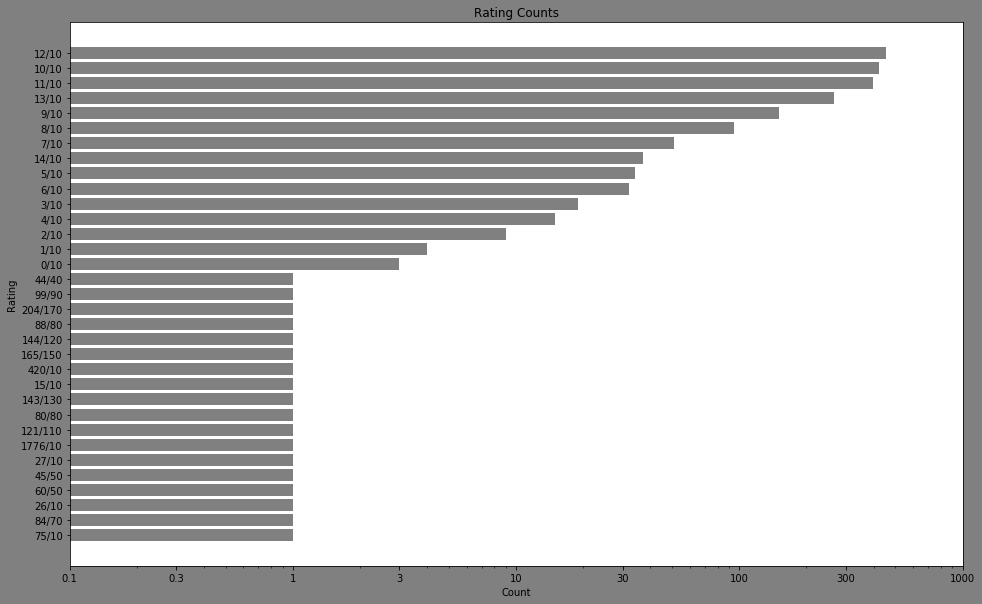

In [77]:
plt.figure(figsize = (16, 10), facecolor = 'grey');
rating_vals = df.rating.value_counts().index[::-1]
plt.barh(rating_vals, df.rating.value_counts()[::-1], color = 'grey');
#plt.xticks(np.arange(0, 500, 10));
plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = [i for i in ticks]
plt.xticks(ticks, labels);
plt.xlabel('Count');
plt.ylabel('Rating');
plt.title('Rating Counts');


**Rating Count Insights**
- Most common rating is 12/10
- All irregular ratings with a numerator greater than 20 appear only once

In [78]:
from collections import Counter

In [79]:
top_preds = Counter(df.query("p1_dog == True").p1).most_common()[:20][::-1]
top_preds2 = Counter(df.query("p2_dog == True").p2).most_common()[:20][::-1]
top_preds3 = Counter(df.query("p3_dog == True").p3).most_common()[:20][::-1]

In [80]:
all_top_preds = [top_preds, top_preds2, top_preds3]

In [81]:
count_dict = {}

for preds in all_top_preds:
    for x, y in preds:
        if not x in count_dict:
            count_dict[x] = int(y)
        else:
            count_dict[x] = int(count_dict[x]) + y

In [82]:
count_dict

{'shetland_sheepdog': 18,
 'eskimo_dog': 81,
 'maltese_dog': 18,
 'staffordshire_bullterrier': 49,
 'siberian_husky': 53,
 'german_shepherd': 20,
 'miniature_pinscher': 42,
 'chesapeake_bay_retriever': 87,
 'french_bulldog': 90,
 'cocker_spaniel': 88,
 'malamute': 54,
 'pomeranian': 104,
 'toy_poodle': 103,
 'samoyed': 40,
 'chow': 72,
 'pug': 55,
 'chihuahua': 179,
 'pembroke': 139,
 'labrador_retriever': 267,
 'golden_retriever': 268,
 'malinois': 20,
 'pekinese': 50,
 'italian_greyhound': 22,
 'kuvasz': 56,
 'collie': 26,
 'beagle': 58,
 'miniature_poodle': 32,
 'cardigan': 95,
 'american_staffordshire_terrier': 23,
 'great_pyrenees': 26,
 'kelpie': 33}

In [83]:
count_list =  list(zip(count_dict.keys(), count_dict.values()))

In [84]:
count_list =  list(zip(count_dict.values(), count_dict.keys()))

In [85]:
count_list = sorted(count_list)

In [86]:
top_preds

[('shetland_sheepdog', 18),
 ('eskimo_dog', 18),
 ('maltese_dog', 18),
 ('staffordshire_bullterrier', 19),
 ('siberian_husky', 20),
 ('german_shepherd', 20),
 ('miniature_pinscher', 22),
 ('chesapeake_bay_retriever', 23),
 ('french_bulldog', 25),
 ('cocker_spaniel', 27),
 ('malamute', 29),
 ('pomeranian', 38),
 ('toy_poodle', 38),
 ('samoyed', 40),
 ('chow', 41),
 ('pug', 55),
 ('chihuahua', 79),
 ('pembroke', 88),
 ('labrador_retriever', 95),
 ('golden_retriever', 139)]

In [87]:
plt.barh?

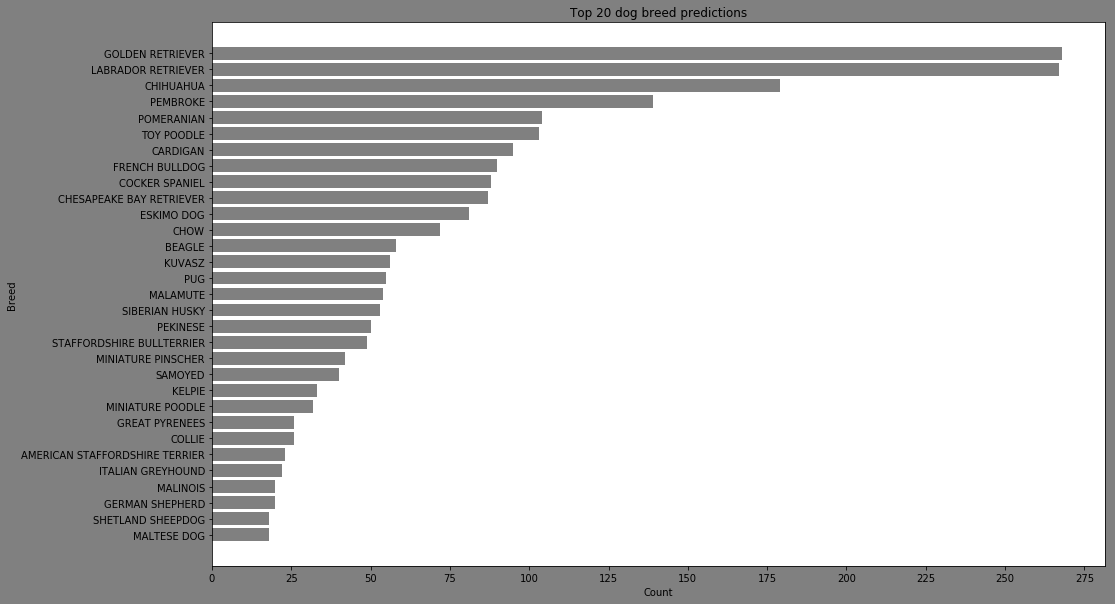

In [88]:
plt.figure(figsize = (16, 10), facecolor = 'grey')

for count, dog in count_list:
    plt.barh(dog.replace('_', ' ').upper(), count,   color= 'grey');

plt.xticks(np.arange(0, 276, 25))
plt.title('Top 20 dog breed predictions');
plt.xlabel('Count');
plt.ylabel('Breed');

**Top 20 Breed Predictions Count Insights**
- Top Prediction is Golden Retriever followed closely by Labrador Retriever. The sum of these two breed predictions makes up over 25% of the dataset.
- Lowest Prediction is Maltese

In [89]:
df.head()

tweet_id  favorites  retweets  \
0  666020888022790149       2541       507   
1  666029285002620928        129        47   
2  666033412701032449        125        44   
3  666044226329800704        296       139   
4  666049248165822465        108        41   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
3  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
4  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

                       p1  p1_confidence  p1_dog                  p2  \
0  welsh_springer_spaniel       0.465074    True              collie   
1                 redbone       0.506826    True  miniature_pinscher   
2         german_shepherd       0.596461    True            malinois   
3     rhodesian_ridgeback       0.408143    True             redbone   
4      miniature_pinscher       0.560311    True          rottweiler   

   p2_confidence  ...    retweeted_status_id retweeted_status_user_id  \
0       0.156665  ...                   None                     None   
1       0.074192  ...                   None                     None   
2       0.138584  ...                   None                     None   
3       0.360687  ...                   None                     None   
4       0.243682  ...                   None                     None   

   retweeted_status_timestamp  \
0                         NaT   
1                         NaT   
2                         NaT   
3                         NaT   
4                         NaT   

                                       expanded_urls  name  doggo floofer  \
0  https://twitter.com/dog_rates/status/666020888...  None  False   False   
1  https://twitter.com/dog_rates/status/666029285...  None  False   False   
2  https://twitter.com/dog_rates/status/666033412...  None  False   False   
3  https://twitter.com/dog_rates/status/666044226...  None  False   False   
4  https://twitter.com/dog_rates/status/666049248...  None  False   False   

  pupper  puppo rating  
0  False  False   8/10  
1  False  False   7/10  
2  False  False   9/10  
3  False  False   6/10  
4  False  False   5/10  

[5 rows x 29 columns]

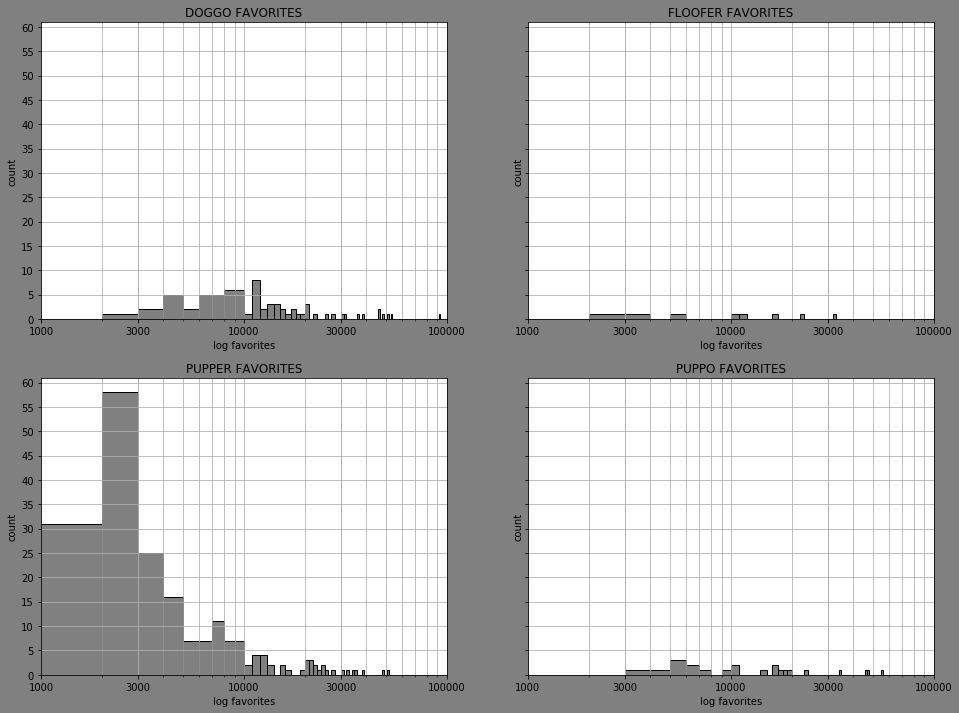

In [236]:

features = ['doggo', 'floofer', 'pupper', 'puppo']

f, ax = plt.subplots(2,2, figsize = (16, 12), facecolor = 'grey', sharey = True)
x = 0
y = 0

ticks = [0.1, 0.3, 1,3,10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = [i for i in ticks]

bins = np.arange(min(df.favorites), max(df.favorites) + 1000, 1000)

def set_axis_info(x, y):
    ax[x, y].set_xlabel('log favorites')
    ax[x, y].set_ylabel("count")
    ax[x, y].set_title(f"{category}".upper()+ " FAVORITES")
    ax[x, y].set_xscale('log')
    ax[x, y].set_xticks(labels)
    ax[x,y].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax[x, y].set_xlim(1000, 100000)
    ax[x, y].set_yticks(np.arange(0, 61, 5))
    ax[x, y].grid(which = 'both')


for category in features:
    if category == 'doggo':
        ax[x, y].hist(df.query(f"{category} == True")['favorites'], bins = bins, color = 'grey', edgecolor = 'black')
        set_axis_info(x, y)
        y+=1
    elif category =='floofer':
        ax[x, y].hist(df.query(f"{category} == True")['favorites'], bins = bins, color = 'grey', edgecolor = 'black')
        set_axis_info(x, y)
        x+= 1
        y = 0
    elif category =='pupper':
        ax[x, y].hist(df.query(f"{category} == True")['favorites'], bins = bins, color = 'grey', edgecolor = 'black')
        set_axis_info(x, y)
        y+=1
    elif category =='puppo':
        ax[x, y].hist(df.query(f"{category} == True")['favorites'], bins = bins, color = 'grey', edgecolor = 'black')
        set_axis_info(x, y)

**Doggo/Floofer/Pupper/Puppo Category Favorites Distribution Insights**
- The Doggo category contains the most favored post around 90,000
- Overall the the pupper class contains the highest counts of favored dogs while the floofers are the least

# SOURCES

"Trouble writing tweet status list to JSON files" https://knowledge.udacity.com/questions/2986

Inception Transfer Learning model attributed to:
"Hands on Machine Learning with Scikit-Learn & Tensorflow by Aurelien Geron"

Images used Inception Model
https://www.kaggle.com/c/dog-breed-identification

Inception Model- 
"Going Deeper with Convolutions - Christian Szegedy, Wei Lie, Yangqing Jia, Pierre Sermanet, Scott Reed Dragomir Anguelov, Dumitru Erhan, Vincent Vanhoucke, Andrew Rabinovich"
https://arxiv.org/abs/1409.4842
